In [1]:
pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
data = pd.read_csv('merged_clean_ver1.csv')

In [5]:
data.head()

,Unnamed: 0,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,0,44060,FL,M,1158.437751,392,430.0,466,520.0,21975.0,28.000000,100.0
1,1,96093,IL,M,537.000000,365,415.0,410,473.0,19387.0,5.666667,7.0
2,2,43333,FL,F,725.000000,301,340.0,361,436.0,18837.0,4.111111,5.0
3,3,21885,NC,M,1158.437751,401,407.0,399,413.0,14014.0,27.277778,38.0
4,4,190108,FL,F,995.000000,252,280.0,316,348.0,17991.0,6.000000,5.0


In [6]:
data['state'].unique()

array(['FL', 'IL', 'NC', 'TX', 'CA', 'NV', 'Cali', 'AP', 'MI', 'OK', 'AR',
       'IN', 'MT', 'WI', 'MO', 'HI', 'UT', 'GA', 'WA', 'ID', 'CT', 'AL',
       'ND', 'SC', 'IA', 'CO', 'LA', 'OR', 'SD', 'TN', 'NM', 'AZ', 'MN',
       'KY', 'NJ', 'NE', 'KS', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'AA', 'PA', 'VT', 'WV', 'GU'],
      dtype=object)

# Lesson 1 

In [7]:
data.describe()
# data.describe(include=[np.number])

,Unnamed: 0,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,499.431255,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,288.332533,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,250.000000,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,499.000000,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,749.000000,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,1001.000000,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


In [8]:
# data.describe(include='all')

In [9]:
import numpy as np
data.describe(include=[np.object])

,state,gender
count,3993,3993
unique,52,10
top,CA,F
freq,751,2080


In [10]:
#transposing data
summary = data.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
Unnamed: 0,3993.0,499.43,288.332533,0.00000,250.0000,499.0,749.000000,1001.0,499.000000
id,3993.0,98929.31,58179.839090,12.00000,46153.0000,101432.0,151653.000000,191779.0,105500.000000
median_home_val,3993.0,1158.44,1033.485773,0.00000,548.0000,803.0,1349.000000,5982.0,801.000000
median_household_income,3993.0,351.62,168.488445,0.00000,239.0000,318.0,425.000000,1500.0,186.000000
ic2,3993.0,400.71,180.568500,0.00000,284.0000,366.0,478.000000,1500.0,194.000000
ic3,3993.0,399.88,164.822741,0.00000,287.0000,365.0,480.000000,1311.0,193.000000
ic4,3993.0,444.73,175.004178,0.00000,325.0000,410.0,528.000000,1331.0,203.000000
ic5,3993.0,16456.41,9455.318118,0.00000,11136.0000,14356.0,18780.000000,174523.0,7644.000000
avggift,3993.0,11.79,10.172672,2.26087,7.1875,10.0,14.428571,450.0,7.241071
target_d,3993.0,15.67,12.703041,1.00000,10.0000,14.0,20.000000,200.0,10.000000


# Lesson 2  

In [11]:
# Exploratory data analysis using matplotlib

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

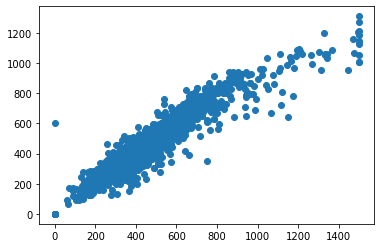

In [13]:
plt.scatter(x=data['ic2'], y=data['ic3'])
plt.show()

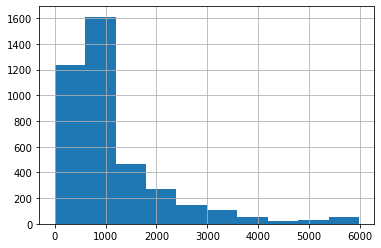

In [14]:
data['median_home_val'].hist()
plt.show()
#without defining the limit of bins, it will default to 10 - see next block

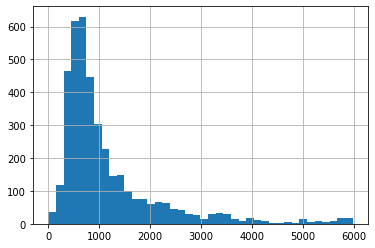

In [15]:
data['median_home_val'].hist(bins=40)
plt.show()

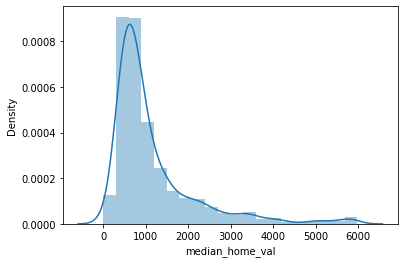

In [16]:
sns.distplot(data['median_home_val'], bins=20)
plt.show()

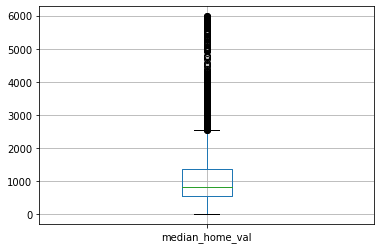

In [17]:
data[['median_home_val']].boxplot()
plt.show()

In [18]:
#upper = 75% +1.5*iqr
#lower = 25% - 1.5*iqr

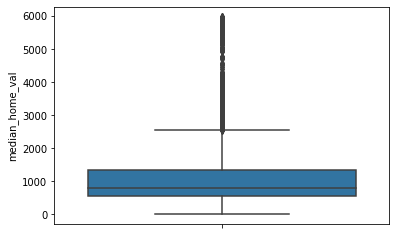

In [19]:
sns.boxplot(y="median_home_val", data=data)
plt.show()

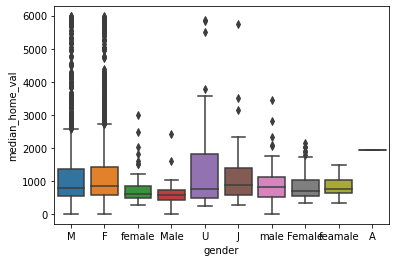

In [20]:
sns.boxplot(x = 'gender',y='median_home_val', data=data)
plt.show()

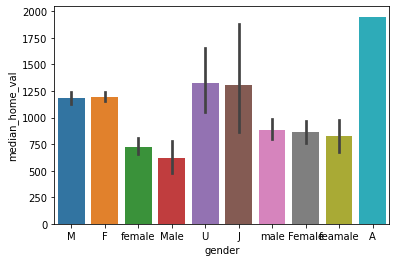

In [21]:
sns.barplot(x="gender", y="median_home_val", data=data)
plt.show()

In [22]:
sns.barplot(x="gender", y="median_home_val", hue= 'ic2_', data=data)
plt.show()

ValueError: Could not interpret input 'ic2_'